# 二手房源信息数据分析与可视化

In [16]:
# 导入模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 设置使中文显示完整
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

#所有房源信息
house=pd.read_csv('house.csv')
house.head(1)

,index,title,community,years,housetype,square,floor,taxtype,totalPrice,unitPrice,followInfo
0,0,宝星华庭一层带花园，客厅挑高，通透四居室。房主自荐,宝星国际三期,底层(共22层)2010年建板塔结合,4室1厅,298.79平米,底层(共22层)2010年建板塔结合,距离15号线望京东站680米房本满五年,2598,86951,53人关注 / 共44次带看 / 一年前发布


## 数据描述性分析

In [17]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16108 entries, 0 to 16107
Data columns (total 11 columns):
index         16108 non-null int64
title         16108 non-null object
community     16108 non-null object
years         16106 non-null object
housetype     16108 non-null object
square        16108 non-null object
floor         16106 non-null object
taxtype       15361 non-null object
totalPrice    16108 non-null int64
unitPrice     16108 non-null int64
followInfo    16108 non-null object
dtypes: int64(3), object(8)
memory usage: 1.4+ MB


In [18]:
# 所有小区信息
community=pd.read_csv('community_describe.csv')
community.head()

,index,id,community,district,bizcircle,tagList,onsale
0,0,1111000004310,什坊院甲3号院,海淀,田村,NaN,0
1,1,1111027373682,大慧寺6号院,海淀,白石桥,NaN,2
2,2,1111027373683,东花市北里东区,东城,东花市,近地铁1号线王府井站,0
3,3,1111027373684,东花市北里西区,东城,东花市,近地铁7号线广渠门内站,7
4,4,1111027373685,东花市北里中区,东城,东花市,近地铁2号线朝阳门站,9


In [19]:
# 合并小区信息和房源信息表，可以获得房源更详细的地理位置
house_detail=pd.merge(house,community,on='community')
# 打印数据
house_detail.head(1)
# len(house_detail)

,index_x,title,community,years,housetype,square,floor,taxtype,totalPrice,unitPrice,followInfo,index_y,id,district,bizcircle,tagList,onsale
0,0,宝星华庭一层带花园，客厅挑高，通透四居室。房主自荐,宝星国际三期,底层(共22层)2010年建板塔结合,4室1厅,298.79平米,底层(共22层)2010年建板塔结合,距离15号线望京东站680米房本满五年,2598,86951,53人关注 / 共44次带看 / 一年前发布,1535,1111027376204,朝阳,望京,近地铁15号线望京东站,7


## 数值型数据描述

In [20]:
house.describe()

,index,totalPrice,unitPrice
count,16108.000000,16108.000000,16108.000000
mean,8053.500000,747.983735,77656.823814
std,4650.123403,536.202306,23616.114546
min,0.000000,15.000000,2539.000000
25%,4026.750000,439.000000,60449.500000
50%,8053.500000,600.000000,75094.000000
75%,12080.250000,870.000000,91474.250000
max,16107.000000,12500.000000,159991.000000


## 数据预处理1：将数据从字符串提取出来

In [21]:
# 将字符串转换成数字
def data_ad(select_data,str):
    if str in select_data:
       return float(select_data[0:select_data.find(str)])
    else:
       return None

# 处理房屋面积数据
house['square']=house['square'].apply(data_ad,str='平米')

In [22]:
# 查看数据
house.head(1)

,index,title,community,years,housetype,square,floor,taxtype,totalPrice,unitPrice,followInfo
0,0,宝星华庭一层带花园，客厅挑高，通透四居室。房主自荐,宝星国际三期,底层(共22层)2010年建板塔结合,4室1厅,298.79,底层(共22层)2010年建板塔结合,距离15号线望京东站680米房本满五年,2598,86951,53人关注 / 共44次带看 / 一年前发布


In [23]:
house.describe()

,index,square,totalPrice,unitPrice
count,16108.000000,16058.000000,16108.000000,16108.000000
mean,8053.500000,95.870368,747.983735,77656.823814
std,4650.123403,57.622963,536.202306,23616.114546
min,0.000000,11.760000,15.000000,2539.000000
25%,4026.750000,61.042500,439.000000,60449.500000
50%,8053.500000,81.125000,600.000000,75094.000000
75%,12080.250000,112.695000,870.000000,91474.250000
max,16107.000000,2623.280000,12500.000000,159991.000000


## 户型的种类

In [24]:
house.housetype.value_counts()

2室1厅     6582
3室1厅     2534
1室1厅     2472
3室2厅     1424
2室2厅     1018
1室0厅      620
4室2厅      496
4室1厅      181
2房间1卫     100
5室2厅       92
1房间1卫      87
1室2厅       64
4室3厅       55
3房间1卫      44
3室0厅       35
2室0厅       34
车位         32
6室2厅       29
5室3厅       22
联排别墅       19
1房间0卫      16
5室1厅       15
6室3厅       13
独栋别墅       12
3室3厅       11
4室0厅       10
叠拼别墅       10
双拼别墅        9
4房间2卫       9
2房间2卫       6
4房间1卫       6
6室1厅        5
5室4厅        4
7室3厅        3
5室5厅        3
3房间2卫       3
6室4厅        3
4房间3卫       2
2房间0卫       2
5房间3卫       2
7室2厅        2
2室3厅        2
6房间4卫       2
6房间2卫       2
9室4厅        2
3房间3卫       2
8室4厅        1
5房间2卫       1
5室0厅        1
4室4厅        1
8房间5卫       1
7室0厅        1
8室2厅        1
6房间3卫       1
2房间3卫       1
3室4厅        1
7室1厅        1
6室0厅        1
Name: housetype, dtype: int64

## 数据预处理2：删除车位信息

In [26]:
car=house[house.housetype.str.contains('车位')]
# 记录中共有车位
car.shape[0]
# 删除车位信息
house.drop(car.index,inplace=True)
# 现在还剩?条记录
car.shape

(32, 11)

## 数据分析1：价格最高的5个别墅

In [27]:
villa=house[house.housetype.str.contains('别墅')]
# 记录中共有别墅?
villa.shape[0]
# 排序
villa.sort_values(by='totalPrice',ascending=False).head(5)

,index,title,community,years,housetype,square,floor,taxtype,totalPrice,unitPrice,followInfo
8020,8020,香山清琴二期独栋别墅，毛坯房原始户型，花园1200平米,香山清琴,2层2007年建,独栋别墅,NaN,2层2007年建,房本满五年,12500,124681,45人关注 / 共7次带看 / 2个月以前发布
102,102,千尺独栋 北入户 红顶商人金融界入住社区,龙湖颐和原著,2层2010年建,独栋别墅,NaN,2层2010年建,距离4号线西苑站839米房本满五年,12000,112012,231人关注 / 共26次带看 / 一年前发布
2729,2729,临湖独栋别墅 花园半亩 观景湖面和绿化 满五年有车库房主自荐,紫玉山庄,3层2000年建,独栋别墅,NaN,3层2000年建,房本满五年,6000,148618,108人关注 / 共16次带看 / 5个月以前发布
3141,3141,银湖别墅 独栋 望京公园旁 五环里 封闭式社区,银湖别墅,3层1998年建,独栋别墅,NaN,3层1998年建,房本满五年,5000,130348,9人关注 / 共3次带看 / 5个月以前发布
4112,4112,首排别墅 位置好 全景小区绿化和人工湖 有车库,亚运新新家园朗月园一期,1层2003年建,联排别墅,NaN,1层2003年建,房本满五年,3800,82364,0人关注 / 共4次带看 / 4个月以前发布


## 数据预处理3：删除别墅信息

In [28]:
house.drop(villa.index,inplace=True)
# 现在还剩下?条记录
house.shape[0]

16026

## 数据分析2：找出数据中的住房户型分布

In [29]:
# 户型分布
house.housetype.value_counts()

2室1厅     6582
3室1厅     2534
1室1厅     2472
3室2厅     1424
2室2厅     1018
1室0厅      620
4室2厅      496
4室1厅      181
2房间1卫     100
5室2厅       92
1房间1卫      87
1室2厅       64
4室3厅       55
3房间1卫      44
3室0厅       35
2室0厅       34
6室2厅       29
5室3厅       22
1房间0卫      16
5室1厅       15
6室3厅       13
3室3厅       11
4室0厅       10
4房间2卫       9
2房间2卫       6
4房间1卫       6
6室1厅        5
5室4厅        4
7室3厅        3
3房间2卫       3
6室4厅        3
5室5厅        3
2房间0卫       2
4房间3卫       2
6房间2卫       2
6房间4卫       2
9室4厅        2
2室3厅        2
5房间3卫       2
3房间3卫       2
7室2厅        2
7室0厅        1
5室0厅        1
4室4厅        1
5房间2卫       1
6室0厅        1
8室2厅        1
6房间3卫       1
8房间5卫       1
3室4厅        1
7室1厅        1
2房间3卫       1
8室4厅        1
Name: housetype, dtype: int64

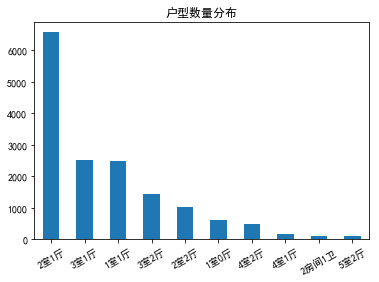

In [33]:
# 可视化绘制
house_type=house.housetype.value_counts()
house_type.head(10).plot(kind='bar',title='户型数量分布',rot=30)
# plt.show()

## 数据分析3：找出关注人数最多的五套房子

In [34]:
house['attention']=house['followInfo'].apply(data_ad,str='人关注')
house.head(5)
house.sort_values(by='attention',ascending=False).head()

,index,title,community,years,housetype,square,floor,taxtype,totalPrice,unitPrice,followInfo,attention
47,47,弘善家园南向开间，满两年，免增值税,弘善家园,中楼层(共28层)2009年建塔楼,1室0厅,42.64,中楼层(共28层)2009年建塔楼,距离10号线十里河站698米房本满两年随时看房,265,62149,1401人关注 / 共305次带看 / 一年前发布,1401.0
2313,2313,四惠东 康家园 南向一居室 地铁1号线出行房主自荐,康家园,顶层(共6层)1995年建板楼,1室1厅,41.97,顶层(共6层)1995年建板楼,距离1号线四惠东站974米房本满五年随时看房,262,62426,1005人关注 / 共86次带看 / 6个月以前发布,1005.0
990,990,远见名苑 东南两居 满五年家庭唯一住房 诚心出售房主自荐,远见名苑,中楼层(共24层)2004年建塔楼,2室1厅,90.14,中楼层(共24层)2004年建塔楼,距离7号线达官营站516米房本满五年,811,89972,979人关注 / 共50次带看 / 8个月以前发布,979.0
2331,2331,荣丰二期朝南复式无遮挡全天采光房主自荐,荣丰2008,中楼层(共10层)2005年建塔楼,1室1厅,32.54,中楼层(共10层)2005年建塔楼,距离7号线达官营站1028米房本满五年随时看房,400,122926,972人关注 / 共369次带看 / 6个月以前发布,972.0
915,915,通州万达北苑地铁站 天时名苑 大两居可改3居,天时名苑,顶层(共9层)2009年建板塔结合,2室2厅,121.30,顶层(共9层)2009年建板塔结合,距离八通线通州北苑站602米房本满五年,645,53174,894人关注 / 共228次带看 / 8个月以前发布,894.0


## 数据分析4：户型和关注人数分布

,housetype,attention
housetype,,
1室0厅,620,32920.0
1室1厅,2472,141893.0
1室2厅,64,2614.0
1房间1卫,87,2267.0
2室1厅,6582,394987.0
2室2厅,1018,49526.0
2房间1卫,100,3006.0
3室1厅,2534,162205.0
3室2厅,1424,81140.0


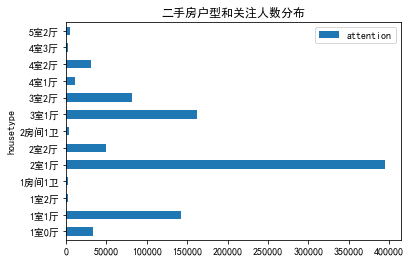

In [40]:
#取户型>50的数据进行可视化
type_interest_group=house.groupby(house['housetype']).agg({'housetype':'count','attention':'sum'})

interest_sort=type_interest_group[type_interest_group['housetype']>50]
interest_sort.plot(kind='barh',title='二手房户型和关注人数分布', y='attention')
interest_sort

## 数据分析5：面积分布

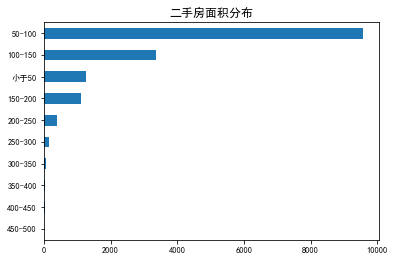

In [45]:
# 面积分布
area_level=[0,50,100,150,200,250,300,350,400,450,500]
label_level=['小于50','50-100','100-150','150-200','200-250','250-300','300-350','350-400','400-450','450-500']
area_cut=pd.cut(house['square'],bins=area_level,labels=label_level)
area_cut.value_counts()[::-1].plot(kind='barh', title='二手房面积分布',fontsize='small')

## 数据分析6：各个行政区房源单价均价

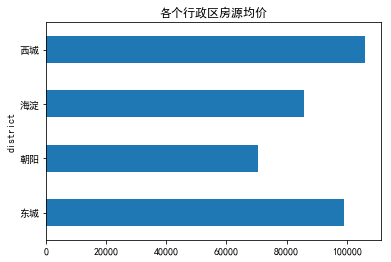

In [48]:
house_unitPrice=house_detail.groupby('district')['unitPrice'].mean()
house_unitPrice.plot(kind='barh', title='各个行政区房源均价')
# agg({'unitPrice':'mean'})

各个行政区房源价钱箱线图绘制

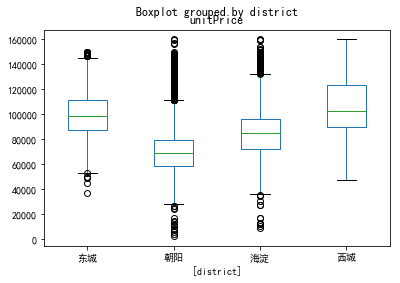

In [81]:
import seaborn as sns
price=house_detail[['district','unitPrice']]
price.boxplot(by='district', grid=0)

各个行政区房源在售数量

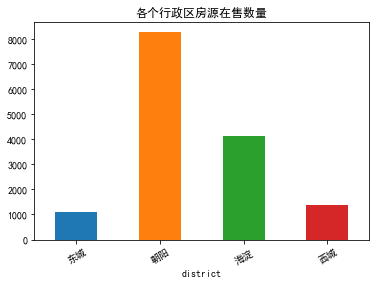

In [21]:
house_onsale=house_detail.groupby('district')['onsale'].count()
house_onsale.plot(kind='bar',rot=30,title='各个行政区房源在售数量')

## 数据分析7：各个行政区的房源总价对比

(0, 6000)

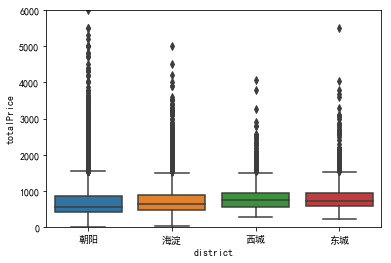

In [22]:
price=house_detail[['district','totalPrice']]
sns.boxplot(x='district',y='totalPrice',data=price)
plt.ylim((0,6000))

通过箱型图看到，各大区域房屋总价中位数都都在1000万以下，且房屋总价离散值较高

## 数据分析8：按照地铁信息对各个区域每平米均价排序，柱形图绘制

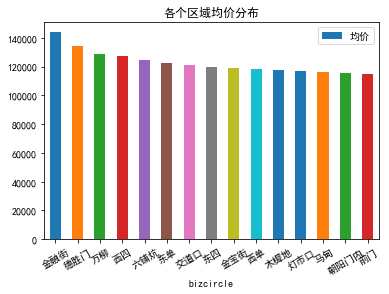

In [23]:
bizcircle_unitPrice=house_detail.groupby('bizcircle')['unitPrice'].mean().sort_values(ascending=False)
bizcircle_unitPrice.head(15).plot(kind='bar',title='各个区域均价分布',rot=30)
plt.legend(['均价'])
# plt.show()

## 数据分析9：按小区均价排序

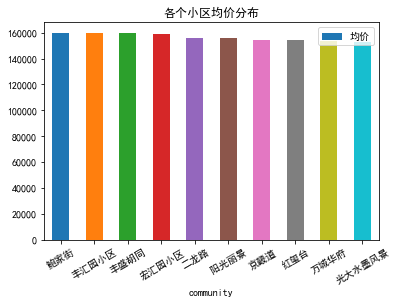

In [24]:
community_unitPrice=house_detail.groupby('community')['unitPrice'].mean().sort_values(ascending=False)
community_unitPrice.head(10).plot(kind='bar',title='各个小区均价分布',rot=30)
plt.legend(['均价'])

## 数据分析10： 楼层的分布情况


In [25]:
# 将字符串转换成数字
def data_ads(select_data,str):
    if str in select_data:
       return (select_data[0:select_data.find(str)])
    else:
       return '没有提取到楼层信息'
# 得到楼层
# 将字符串转换成数字
house['layer']=house['years'].apply(data_ads,str='(')
house.head(3)

,index,title,community,years,housetype,square,floor,taxtype,totalPrice,unitPrice,followInfo,attention,layer
0,0,宝星华庭一层带花园，客厅挑高，通透四居室。房主自荐,宝星国际三期,底层(共22层)2010年建板塔结合,4室1厅,298.79,底层(共22层)2010年建板塔结合,距离15号线望京东站680米房本满五年,2598,86951,53人关注 / 共44次带看 / 一年前发布,53.0,底层
1,1,三面采光全明南北朝向 正对小区绿地花园,顶秀青溪,中楼层(共11层)2008年建板塔结合,3室2厅,154.62,中楼层(共11层)2008年建板塔结合,距离5号线立水桥站1170米房本满两年随时看房,1000,64675,323人关注 / 共579次带看 / 一年前发布,323.0,中楼层
2,2,沁园公寓 三居室 距离苏州街地铁站383米,沁园公寓,低楼层(共24层)1999年建塔楼,3室2厅,177.36,低楼层(共24层)1999年建塔楼,距离10号线苏州街站383米房本满五年,1200,67659,185人关注 / 共108次带看 / 一年前发布,185.0,低楼层


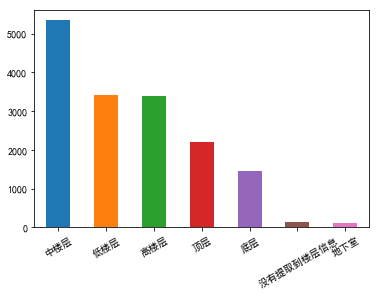

In [26]:
# 楼层分布及可视化
house['layer'].value_counts().plot(kind='bar',rot=30)

## 数据分析11：绘制2000到2016平均房价（年份与总售价的可视化）

In [27]:
# 得到年份
def data_adst(select_data,str):
    if str in select_data:
        return (select_data[select_data.find(str)-5:select_data.find(str)])
    else:
        return None
house['year']=house['years'].apply(data_adst,str='建')
house.head(4)

,index,title,community,years,housetype,square,floor,taxtype,totalPrice,unitPrice,followInfo,attention,layer,year
0,0,宝星华庭一层带花园，客厅挑高，通透四居室。房主自荐,宝星国际三期,底层(共22层)2010年建板塔结合,4室1厅,298.79,底层(共22层)2010年建板塔结合,距离15号线望京东站680米房本满五年,2598,86951,53人关注 / 共44次带看 / 一年前发布,53.0,底层,2010年
1,1,三面采光全明南北朝向 正对小区绿地花园,顶秀青溪,中楼层(共11层)2008年建板塔结合,3室2厅,154.62,中楼层(共11层)2008年建板塔结合,距离5号线立水桥站1170米房本满两年随时看房,1000,64675,323人关注 / 共579次带看 / 一年前发布,323.0,中楼层,2008年
2,2,沁园公寓 三居室 距离苏州街地铁站383米,沁园公寓,低楼层(共24层)1999年建塔楼,3室2厅,177.36,低楼层(共24层)1999年建塔楼,距离10号线苏州街站383米房本满五年,1200,67659,185人关注 / 共108次带看 / 一年前发布,185.0,低楼层,1999年
3,3,金星园东南向户型，四居室设计，中间楼层,金星园,中楼层(共28层)2007年建塔楼,4室2厅,245.52,中楼层(共28层)2007年建塔楼,距离机场线三元桥站1153米房本满五年,1650,67205,157人关注 / 共35次带看 / 一年前发布,157.0,中楼层,2007年


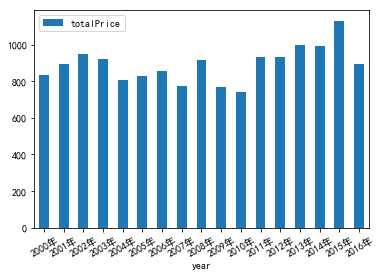

In [28]:
# 绘制2000到2016平均房价
data=house.groupby('year').agg({'totalPrice':'mean'})
data
data['2000年':'2016年'].plot(kind='bar',rot=30)

## 综合：紧邻望京地铁站,三室一厅，400万-500万，大于80平米的房子

### 第一步：找出望京附近的房屋信息

In [43]:
myhouse=house_detail[house_detail.bizcircle.str.contains('望京')]
# myhouse.head(2)
len(myhouse)

896

### 第二步：查看分布情况

2室1厅     230
3室2厅     155
2室2厅     134
1室1厅     117
3室1厅     108
4室2厅      55
1室0厅      25
4室1厅      25
2房间1卫     13
5室2厅       8
Name: housetype, dtype: int64

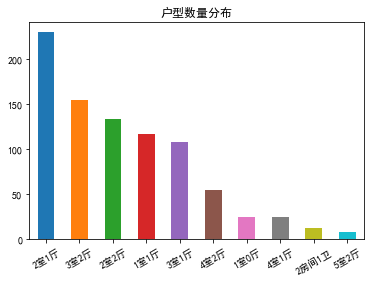

In [44]:
house_type=myhouse['housetype'].value_counts()
house_type.head(10).plot(kind='bar',title='户型数量分布',rot=30)
house_type.head(10)

### 第三步：找到三室一厅的房源信息以及400万-500万，大于80平米的房源信息

In [45]:
# 1 找到三室一厅的房源信息
myhouse=myhouse[myhouse.housetype.str.contains('3室1厅')]
len(myhouse)

108

In [48]:
# 2 房屋总价400万-500万之间
myhouse=myhouse.loc[(myhouse['totalPrice']>400)&(myhouse['totalPrice']<500)]
myhouse.head()
len(myhouse)

7

In [53]:
# 将字符串转换成数字
# def data_ad(select_data,str):
#     if str in select_data:
#        return float(select_data[0:select_data.find(str)])
#     else:
#        return None

# 处理房屋面积数据
myhouse['square']=myhouse['square'].apply(data_ad,str='平米')

In [55]:
# 3 房屋面积大于80平米
myhouse=myhouse.loc[myhouse.square>80]
len(myhouse)
myhouse.head()

,index_x,title,community,years,housetype,square,floor,taxtype,totalPrice,unitPrice,followInfo,index_y,id,district,bizcircle,tagList,onsale
7824,2806,花家地西里一区东西向三居室 中间楼层 带电梯房主自荐,花家地西里一区,中楼层(共12层)1997年建板塔结合,3室1厅,82.10,中楼层(共12层)1997年建板塔结合,房本满五年随时看房,480,58466,245人关注 / 共75次带看 / 5个月以前发布,820,1111027375067,朝阳,望京,近地铁14号线(东段)阜通站,8
14022,8669,经典三居室格局合理社区安静配套成熟房主自荐,中环南路5号院,顶层(共6层)1996年建板楼,3室1厅,88.51,顶层(共6层)1996年建板楼,距离14号线(东段)望京南站701米房本满两年,495,55926,35人关注 / 共0次带看 / 2个月以前发布,4718,1111027382477,朝阳,望京,近地铁14号线(东段)望京南站,1
